# Analysis and Visualisation



For accurate analysis, we use the original dataset for the actual values of money, which existed before we altered their values and distributions in the previous explroatory data analysis.

In [1]:
import sys
sys.path.insert(0, ".")

from pathlib import Path
import db_utils
import pandas as pd

db_utils

df = pd.read_csv('loan_payments.csv')
df

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,0.00,0.00,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,0.00,0.00,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,0.00,0.00,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,0.00,0.00,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,0.00,0.00,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36 months,9.01,159.03,B,B2,...,0.00,0.00,Jul-2016,160.61,NaN,Jul-2016,NaN,NaN,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36 months,10.59,162.73,C,C2,...,0.00,0.00,Oct-2016,490.01,NaN,Sep-2016,0.0,NaN,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36 months,7.43,108.77,A,A2,...,0.00,0.00,Sep-2016,110.58,Sep-2016,May-2013,NaN,NaN,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36 months,7.43,155.38,A,A2,...,0.00,0.00,Mar-2014,0.00,NaN,May-2013,NaN,NaN,1,INDIVIDUAL


## Current State of the Loans




We will query the data to check the current state of the payments:


What percentage of the loans are recovered against the investor funding and the total amount funded?

we can visualise the results on an appropriate graph.



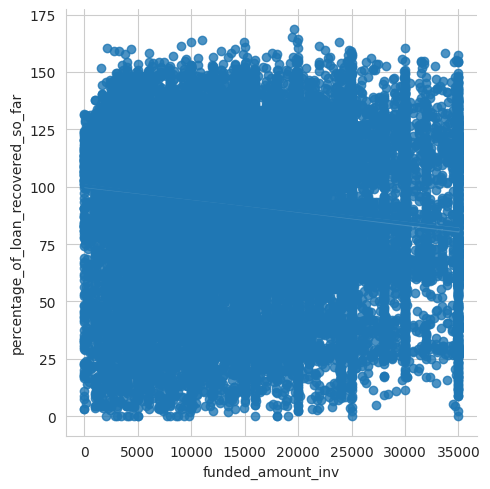

In [15]:
from Plotter import Plotter
plotter_instance = Plotter()

# for each row in df:
#     percentage_of_loan_recovered_so_far = 100*total_payment/loan_amount
#     total_funded = funded_amount + funded_amount_inv

df['percentage_of_loan_recovered_so_far'] = 100*df.total_payment/df.loan_amount

# print('percentage_of_loan_recovered_so_far:')
# print(percentage_of_loan_recovered_so_far)

# plotter_instance.scattergraph(df, df.funded_amount , percentage_of_loan_recovered_so_far)

import seaborn as sns
    
ax = sns.lmplot(data=df, x='funded_amount_inv', y='percentage_of_loan_recovered_so_far')

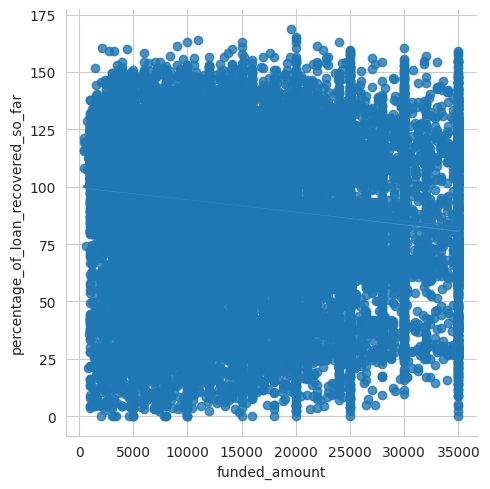

In [16]:
ax = sns.lmplot(data=df, x='funded_amount', y='percentage_of_loan_recovered_so_far')

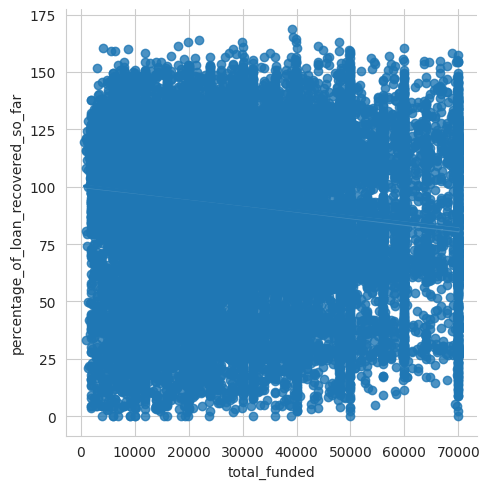

In [19]:
df['total_funded'] = df.funded_amount + df.funded_amount_inv

ax = sns.lmplot(data=df, x='total_funded', y='percentage_of_loan_recovered_so_far')

We can also visualise what percentage of the total amount would be recovered up to 6 months' in the future:

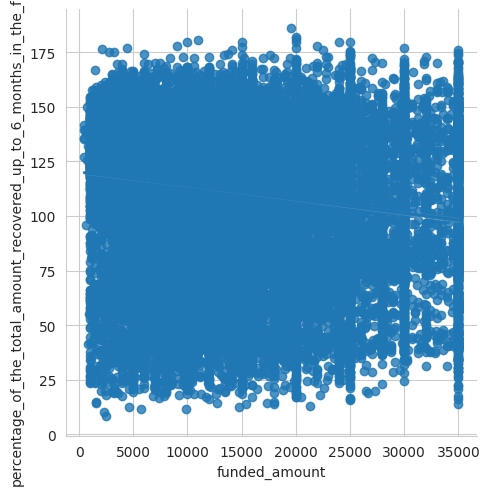

In [20]:
df['percentage_of_the_total_amount_recovered_up_to_6_months_in_the_future'] = 100*(df.total_payment+df.instalment*6)/df.loan_amount

# plotter_instance.scattergraph(df.loan_amount, percentage_of_the_total_amount_recovered_up_to_6_months_in_the_future)

ax = sns.lmplot(data=df, x='funded_amount', y='percentage_of_the_total_amount_recovered_up_to_6_months_in_the_future')
